In [38]:
from src.data import load_karate_club, load_cora_dataset
from src.experiments import show_karate_gt_vs_prediction, report_metrics, draw_dot_plot, rearrange_tau, write_em_results, load_em_results
from src.em import em_algorithm
from src.metrics import SBM_clustering_coefficient

import networkx as nx
import os

In [2]:
%reload_ext autoreload
%autoreload 2

# Zachary's Karate Club dataset

Number of nodes: 34
Number of edges: 78


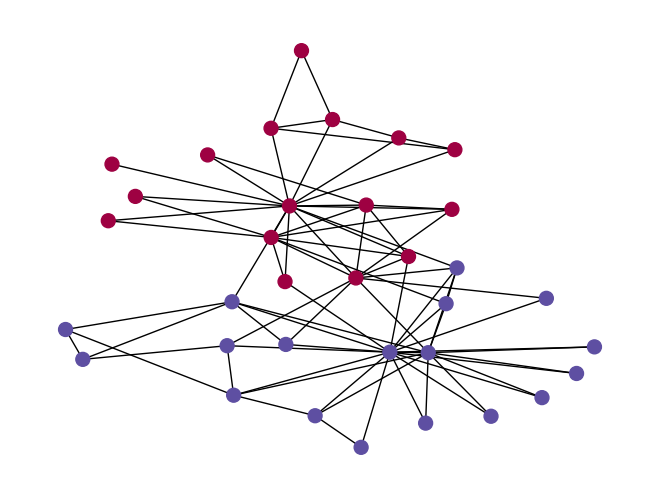

In [58]:
X, y = load_karate_club()
G = nx.from_numpy_array(X)
Q = 2
pos = nx.kamada_kawai_layout(G)
nx.draw(G, node_color=y, pos=pos, node_size=100, cmap='Spectral')

In [72]:
alpha_pred, pi_pred, tau_pred = em_algorithm(X, Q=Q, n_init=20, iterations=100)

After EM iteration 100/100 : Mean log likelihood (1 paths) -193.531649...


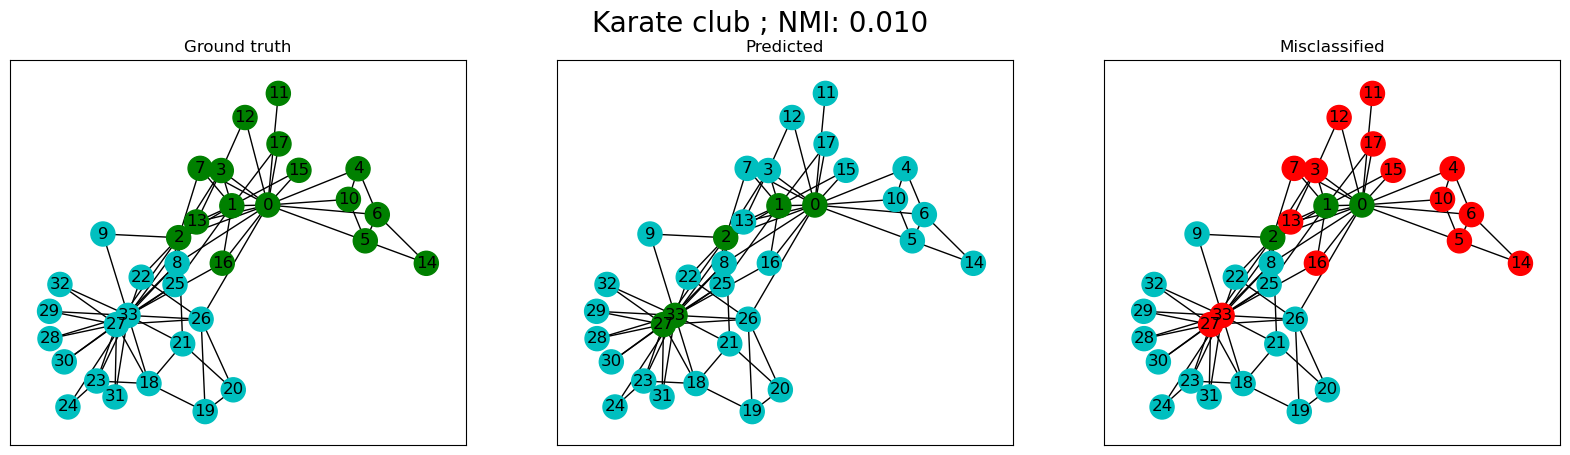

In [73]:
show_karate_gt_vs_prediction(G, tau_pred, y)

In [77]:
report_metrics(X, tau_pred, y, Q)

NMI: 0.010
Rand index: 0.492
Gt Modularity: 0.371
Pred Modularity: -0.208
Graph clustering coefficient: 0.2556818181818182
Per class gt clustering coefficients: [0.41899441340782123, 0.25961538461538464]
Per class pred clustering coefficients: [0.5, 0.23076923076923078]


# Cora dataset

In [3]:
X, y = load_cora_dataset()
Q = 7

Number of nodes: 2708
Number of edges: 5278


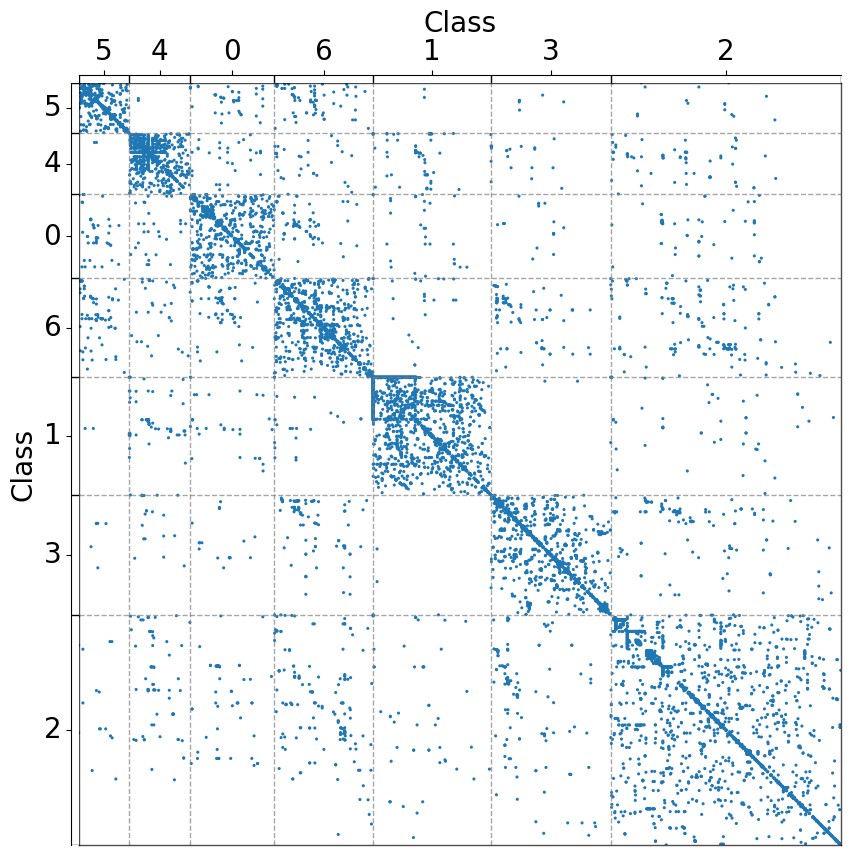

In [4]:
draw_dot_plot(X, y, save_as='cora_gt')

In [33]:
alpha_pred, pi_pred, tau_pred = em_algorithm(X, Q=Q, n_init=5, iterations=100)

EM algorithm interrupted by user after 50/100 iterations.   nan...54415...



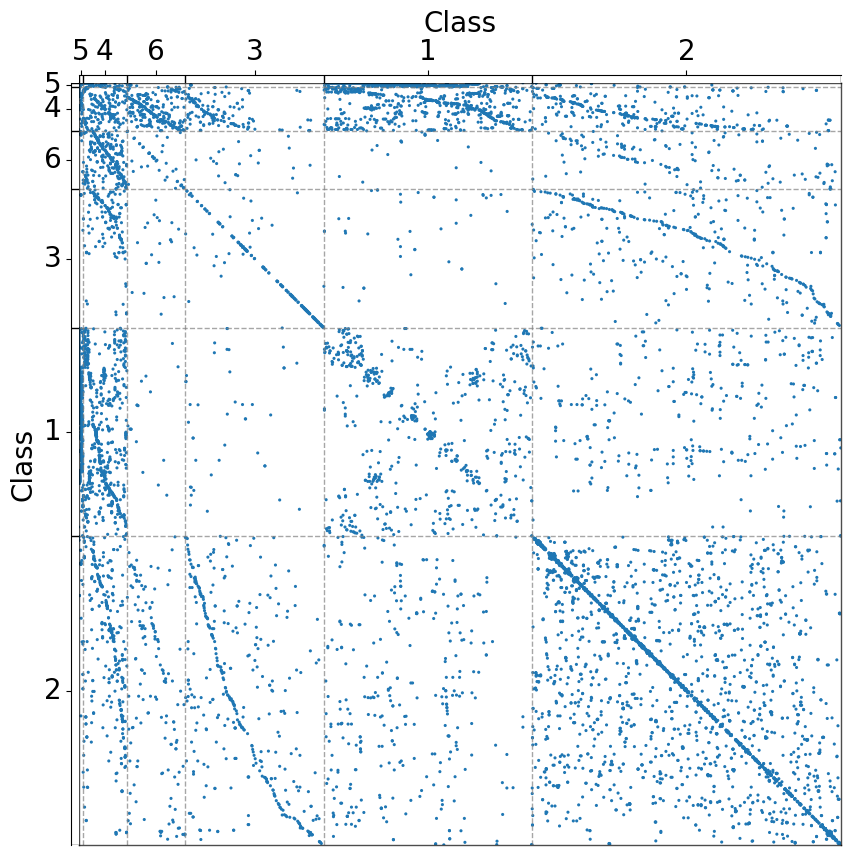

In [34]:
rearranged_tau_pred = rearrange_tau(tau_pred, y, Q=Q)
classification = rearranged_tau_pred.argmax(axis=1)
classification = 
draw_dot_plot(X, classification, save_as='cora_SBM_2')

In [35]:
write_em_results(alpha_pred, pi_pred, tau_pred, path=os.path.join('EM', 'cora_2'))

In [36]:
alpha_pred, pi_pred, tau_pred = load_em_results(path=os.path.join('EM', 'cora_2'))

In [37]:
report_metrics(X, rearranged_tau_pred, y, Q, detailed=False)

NMI: 0.046
Rand index: 0.651
Gt Modularity: 0.640
Pred Modularity: 0.125


In [40]:
print("SBM clustering coefficient: ", SBM_clustering_coefficient(alpha_pred, pi_pred))

SBM clustering coefficient:  0.0035485502230833063
